In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

In [2]:
inputFile = './data/house5/channel_7.dat'
file_read = pd.read_csv(inputFile, sep=' ', names = ['Timestamp','Usage']) 

count = 0
for i in file_read['Usage']:
    if i > 1:
        count+=1
        i = 2
print(count)
for i in range(0, len(file_read['Usage'])):
    if (file_read['Usage'][i] > 1):
        file_read['Usage'][i] = 2
        
count = 0
for i in file_read['Usage']:
    if i > 2:
        count+=1
        i = 2
print(count)

#dateData = np.forfile_read['Timestamp'])
#timestampArray = np.array(file_read['Timestamp']).reshape(-1,1)
#convertedTime = np.apply_along_axis(datetime.fromtimestamp, 1, timestampArray)
#dataDate = convertedTime[]

#print(file_read['Timestamp'])
#file_read = pd.DataFrame(file_read)
#file_read = pd.DataFrame(file_read.row.str.split(' ',1).tolist(), columns = ["Timestamp","Usage"])
#file_read['Timestamp'], file_read['Usage'] = zip(*file_read['Timestamp'].map(lambda x: x.split(' ')))

28845
0


In [67]:
file_read['Timestamp'] = pd.to_datetime(file_read['Timestamp'],unit='s')
file_read['Date'] = file_read['Timestamp'].dt.date
file_read['Year'] = file_read['Timestamp'].dt.year
file_read['Month'] = file_read['Timestamp'].dt.month
file_read['Day'] = file_read['Timestamp'].dt.day
file_read['Hour'] = file_read['Timestamp'].dt.hour
file_read['Minute'] = file_read['Timestamp'].dt.minute
file_read['Second'] = file_read['Timestamp'].dt.second
file_read.to_csv(inputFile+'.csv', sep=',')

In [68]:
#print(file_read['Date'])

In [69]:
print (type(file_read['Year'][0]))
#print(file_read)

<class 'numpy.int64'>


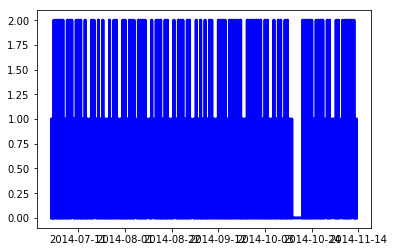

In [70]:
#plt.figure(figsize=(100,100))
#plt.xlabel('Date')
#plt.ylabel('Usage')
#plt.interactive(True)
#plt.ion()
plt.plot(file_read['Date'], file_read['Usage'], color='blue', linewidth=3)
#plt.draw()
plt.show()
#plt.savefig('timestamp.png')

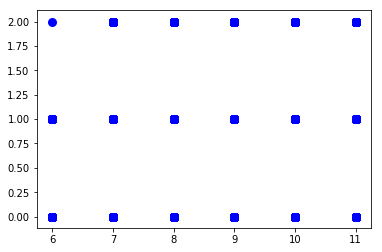

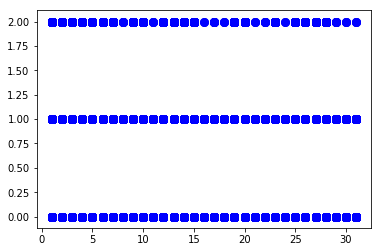

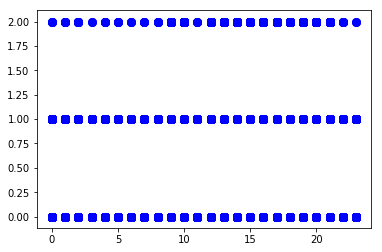

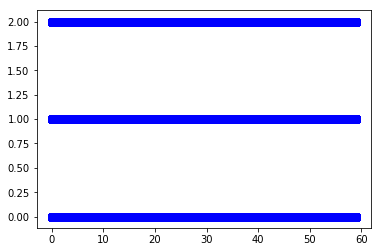

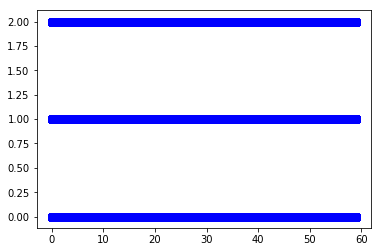

In [40]:
plt.scatter(file_read['Month'], file_read['Usage'], color='blue', linewidth=3)
plt.show(block=False)
plt.scatter(file_read['Day'], file_read['Usage'], color='blue', linewidth=3)
plt.show(block=False)
plt.scatter(file_read['Hour'], file_read['Usage'], color='blue', linewidth=3)
plt.show(block=False)
plt.scatter(file_read['Minute'], file_read['Usage'], color='blue', linewidth=3)
plt.show(block=False)
plt.scatter(file_read['Second'], file_read['Usage'], color='blue', linewidth=3)
plt.show(block=False)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x = file_read['Day']  
#file_read['Date']
#print(x)
y = file_read['Hour']
z = file_read['Usage']

ax.scatter(x, y, z, c='r', marker='o')

ax.xaxis.set_ticks(x)
ax.xaxis.set_ticklabels(file_read['Date'])
ax.set_xlabel('Hour')
ax.set_ylabel('Minute')
ax.set_zlabel('Usage')

plt.show()
'''
ax.plot(x, y, z, c='r', marker='o')

ax.set_xlabel('Hour')
ax.set_ylabel('Minute')
ax.set_zlabel('Usage')

plt.show()
'''

In [8]:
#del file_read['Timestamp']
train, validate, test = np.split(file_read.sample(frac=1), [int(.6*len(file_read)), int(.8*len(file_read))])
#print(train['Usage'].size, ' ' , train['Usage'].size)
#print(test['Usage'].size, ' ' , test['Usage'].size)
#print(test['Month'])
#print(train['Timestamp'], train['Usage'])

In [5]:

#print(max(file_read['Usage']))

In [6]:
#plt.plot(train)
#plt.ylabel('some numbers')
#plt.show()

In [7]:
#train_x, train_y = np.hsplit(train, 2)
#test_x, test_y = np.hsplit(test, 2)
#time1 = datetime.fromtimestamp(train_x)
#print(time1)
#print(train_x)
#print(train_y)

In [11]:
reg = linear_model.LinearRegression()
#reg.fit(np.array(train['Hour']).reshape(-1,1),np.array(train['Usage']).reshape(-1,1))
train_day = np.array(train['Day']).reshape(-1,1)
train_hour = np.array(train['Hour']).reshape(-1,1)
train_min = np.array(train['Minute']).reshape(-1,1)
train_sec = np.array(train['Second']).reshape(-1,1)
train_data = np.concatenate((train_day,train_hour, train_min, train_sec), axis = 1)
train_data = train_data.reshape(-1,4)
#print(train_day, train_hour)
print(train_data)
print(len(train['Day']), len(train['Hour']), len(train['Usage']))
#train_array = np.array(train['Month'], train['Day'], train['Hour'], train['Minute'], train['Second']).reshape(-1,5)
#print(train_array)
#'Day', 'Hour', 'Minute', 'Second'])
#train_x = (train['Month', 'Day', 'Hour', 'Minute', 'Second']).reshape(-1, 5)

reg.fit(train_data,np.array(train['Usage']).reshape(-1,1))

[[ 7 13 50 11]
 [26 11 48  9]
 [ 9  3 47 35]
 ..., 
 [ 8 13 52 39]
 [ 8 12 52  7]
 [15 21 47 10]]
1111150 1111150 1111150


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print(np.array(test['Hour']).reshape(-1,1))

test_day = np.array(test['Day']).reshape(-1,1)
test_hour = np.array(test['Hour']).reshape(-1,1)
test_min = np.array(test['Minute']).reshape(-1,1)
test_sec = np.array(test['Second']).reshape(-1,1)
test_data = np.concatenate((test_day,test_hour, test_min, test_sec), axis = 1)
test_data = test_data.reshape(-1,4)

test_predict = reg.predict(test_data)
print(test_predict)
print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(np.array(test['Usage']).reshape(-1,1), test_predict))
print('Variance score: %.2f' % r2_score(np.array(test['Usage']).reshape(-1,1), test_predict))
#print(test_y, test_predict)


[[ 5]
 [15]
 [ 5]
 ..., 
 [14]
 [ 7]
 [ 6]]
[[ 0.05866123]
 [ 0.06864643]
 [ 0.05277452]
 ..., 
 [ 0.06957135]
 [ 0.05615685]
 [ 0.04800524]]
Coefficients: 
 [[ -8.74125418e-04   3.44535489e-03   6.84959952e-06   3.24643227e-06]]
Mean squared error: 0.10
Variance score: 0.01


In [16]:
print(len(test['Day']), len(test_predict))

370384 370384


100000000


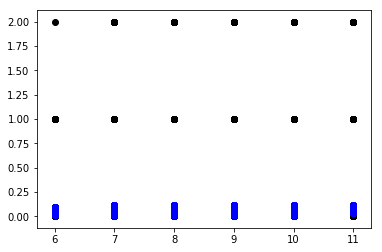

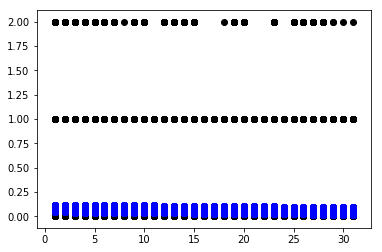

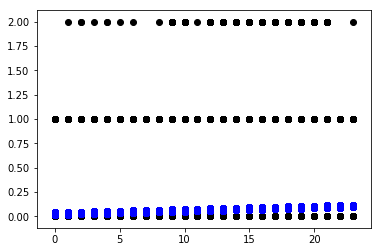

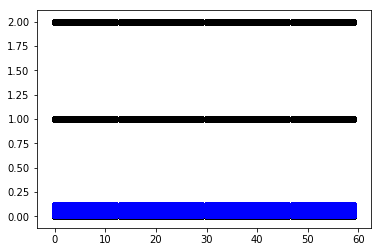

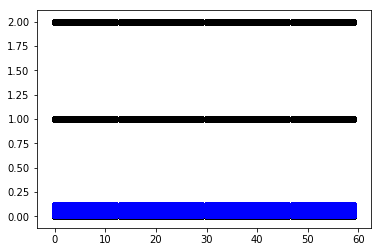

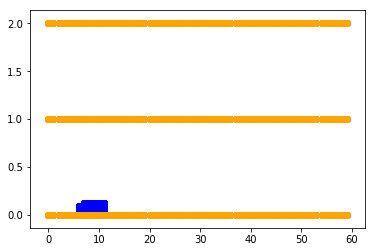

In [42]:
# Plot outputs
print(plt.rcParams['agg.path.chunksize'])
plt.rcParams['agg.path.chunksize'] = 100000000 
plt.scatter(test['Month'], test['Usage'],  color='black')
plt.scatter(test['Month'], test_predict,  color='blue')
plt.show()

plt.scatter(test['Day'], test['Usage'],  color='black')
plt.scatter(test['Day'], test_predict,  color='blue')
plt.show()

plt.scatter(test['Hour'], test['Usage'],  color='black')
plt.scatter(test['Hour'], test_predict,  color='blue')
plt.show()

plt.scatter(test['Minute'], test['Usage'],  color='black')
plt.scatter(test['Minute'], test_predict,  color='blue')
plt.show()

plt.scatter(test['Second'], test['Usage'],  color='black')
plt.scatter(test['Second'], test_predict,  color='blue')
plt.show()



plt.scatter(test['Month'], test['Usage'],  color='black')
plt.scatter(test['Month'], test_predict,  color='blue')
plt.scatter(test['Day'], test['Usage'],  color='green')
plt.scatter(test['Hour'], test['Usage'],  color='yellow')
plt.scatter(test['Minute'], test['Usage'],  color='red')
plt.scatter(test['Second'], test['Usage'],  color='orange')
plt.show()
